# Class 4: Distributions of Network Properties & Centralities


Goal of today's class:
1. Define more centrality measures
2. Explore network *null* generative models
3. (Bonus) Introduce *correlations* among node properties

*Acknowledgement: Much of the material in this lesson is based on a previous course offered by Matteo Chinazzi and Qian Zhang.*

__________

1. Come in. Sit down. Open Teams.
2. Make sure your notebook from last class is saved.
3. Open up the Jupyter Lab server.
4. Open up the Jupyter Lab terminal.
5. Activate Conda: `module load anaconda3/2022.05`
6. Activate the shared virtual environment: `source activate /courses/PHYS7332.202510/shared/phys7332-env/`
7. Run `python3 git_fixer2.py`
8. Github:
    - git status (figure out what files have changed)
    - git add ... (add the file that you changed, aka the `_MODIFIED` one(s))
    - git commit -m "your changes"
    - git push origin main
________

(quick example of colors and hexcolors in matplotlib)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')
rc('axes', axisbelow=True)

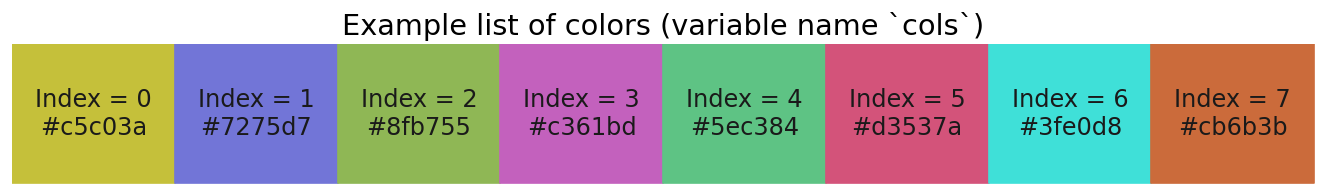

In [2]:
cols = ["#c5c03a","#7275d7","#8fb755","#c361bd","#5ec384","#d3537a","#3fe0d8","#cb6b3b"]
fig, ax = plt.subplots(1,1,figsize=(len(cols)*1.75,1.5),dpi=120)

xvals = np.linspace(0,1,len(cols)+1)
for i in range(len(xvals)-1):
    ax.fill_between([xvals[i],xvals[i+1]],
                     0,1,color=cols[i])
    ax.text(np.mean([xvals[i],xvals[i+1]]),0.5,'Index = %i\n%s'%(i,cols[i]),
            ha='center',va='center',color='.1',fontsize='x-large')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_axis_off()
ax.set_title('Example list of colors (variable name `cols`)',fontsize='xx-large')

plt.show()

_______
## Degree, or *Degree Centrality*
One way to think of a node's influence (or importance, size, reach, etc.) is through its degree—how many neighbors it's connected to. Surely that's not all there is to it!

### Common Centrality Measures
- **Closeness Centrality**:
- **Betweenness Centrality**: How often a node serves as a bridge along the shortest path between other pairs of nodes.
- **Eigenvector Centrality**: Considers not only a node's degree but also its neighbors' degree.
- **PageRank**: Variation of eigenvector centrality (originally used by Google), which includes random noise in the connectivitiy.
- **Katz Centrality**: Variation of eigenvector centrality, but includes a weight factor that decreases the contribution of longer walks, therby making closer nodes more influential.
- **Clustering** (kinda): Measures how close a node’s neighbors are to forming a complete clique (usually a clique of size 3, aka a triangle).
- **Flow Betweenness**: Computes the total flow of information passing through a node, assuming that "flows" can follow all paths in the network, and not just the shortest.

#### Case Study: Closeness Centrality

*Closeness centrality* is an attempt to quantify how readily a given node can access all other nodes in the network, based on the idea that a node is more "central" if it is "closer" to all other nodes, where closeness is defined as the average length of the shortest paths from the node to all others in the network.

To calculate closeness centrality, you take the inverse of the sum of the shortest path distances from the node in question to all other nodes. Therefore, a node with high closeness centrality has shorter distances to other nodes, meaning it can spread information more efficiently or reach other nodes more quickly.

$$
C(i) = \frac{1}{\sum_{i \neq j} d(i, j)}
$$

where $d(i,j)$ is the shortest path distance between node $i$ and $j$. Closeness centrality assumes the network is connected, and it can be modified to handle disconnected graphs by calculating the harmonic mean of distances instead, which is known as harmonic centrality.

Citation: Freeman, L.C. (1978). Centrality in Social Networks: Conceptual Clarification. *Social Networks*, vol. 1, no. 3, pp. 215-239. doi: https://doi.org/10.1016/0378-8733(78)90021-7.

__________
Let's try it out!

As is often the case, `networkx` has a function to calculate this.

In [3]:
G = nx.karate_club_graph()

In [4]:
nx.closeness_centrality(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

Starting small, how do we calculate the closeness centrality of a single node if we were doing this from scratch?

**Hint:** Here, we're allowed to use built-in `networkx` functionalities, like `nx.shortest_path_length`, which takes a graph object and a given node as input, and returns a dictionary with the nodes as keys and values being the lengths of the shortest paths between the input node and all others.

In [5]:
node_i = 0
shortest_paths = nx.shortest_path_length(G, source=node_i)
shortest_paths

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 17: 1,
 19: 1,
 21: 1,
 31: 1,
 30: 2,
 9: 2,
 27: 2,
 28: 2,
 32: 2,
 16: 2,
 33: 2,
 24: 2,
 25: 2,
 23: 3,
 14: 3,
 15: 3,
 18: 3,
 20: 3,
 22: 3,
 29: 3,
 26: 3}

(here, remember from class 03 where we did this manaully)

![](images/pngs/networkx_example_BFS.png)

In [6]:
# Sum the lengths of the shortest paths
total_distance = sum(shortest_paths.values())
total_distance

58

In [7]:
N = G.number_of_nodes()

# Closeness centrality calculation (ignoring disconnected components)
if total_distance > 0 and N > 1:
    closeness_i = (N - 1) / total_distance
else:
    closeness_i = 0.0  # In case the node is isolated
    
closeness_i

0.5689655172413793

_____
All together now.

In [8]:
def closeness_centrality_from_scratch(G):    
    """
    Calculate the closeness centrality for each node in a graph from scratch.

    Closeness centrality is a measure of how close a node is to all other nodes
    in the network. It is calculated as the reciprocal of the sum of the shortest
    path distances from a node to all other nodes in the graph. This function 
    computes the closeness centrality for all nodes in the graph `G` without 
    using any external library functions for the centrality calculation.

    Parameters
    ----------
    G : networkx.Graph
        The input graph on which the closeness centrality is calculated. It can
        be any type of graph (undirected, directed, etc.) supported by NetworkX.

    Returns
    -------
    centrality : dict
        A dictionary where the keys are nodes in the graph and the values are
        their corresponding closeness centrality scores. If a node is isolated,
        its centrality will be 0.

    Notes
    -----
    - For each node, this function computes the sum of shortest path lengths to 
      all other reachable nodes in the graph using NetworkX's `shortest_path_length`.
    - Nodes that are disconnected from the rest of the graph will have a centrality 
      of 0.0.
    - This function assumes that the graph is connected; however, it gracefully 
      handles isolated nodes by assigning them a centrality score of 0.0.

    Time Complexity
    ---------------
    The time complexity is O(N * (V + E)), where N is the number of nodes, V is 
    the number of vertices, and E is the number of edges, due to the use of 
    shortest path calculations for each node.

    Citations
    ---------
    Bavelas, A. (1950). Communication patterns in task-oriented groups. The Journal 
    of the Acoustical Society of America, 22(6), 725-730.

    Sabidussi, G. (1966). The centrality index of a graph. Psychometrika, 31(4), 581–603.

    Freeman, L. C. (1979). Centrality in social networks conceptual clarification. 
    Social Networks, 1(3), 215–239.

    Example
    -------
    >>> import networkx as nx
    >>> G = nx.path_graph(4)
    >>> closeness_centrality_from_scratch(G)
    {0: 0.6666666666666666, 1: 1.0, 2: 1.0, 3: 0.6666666666666666}
    """

    centrality = {}
    N = G.number_of_nodes()  # Total number of nodes in the graph

    for node_i in G.nodes():
        # Compute shortest paths from node_i to all other nodes
        shortest_paths = nx.shortest_path_length(G, source=node_i)
        
        # Sum the lengths of the shortest paths
        total_distance = sum(shortest_paths.values())

        # Closeness centrality calculation (ignoring disconnected components)
        if total_distance > 0 and N > 1:
            centrality[node_i] = (N - 1) / total_distance
        else:
            centrality[node_i] = 0.0  # In case the node is isolated

    return centrality

In [9]:
closeness_centrality_from_scratch(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [10]:
nx.closeness_centrality(G)==closeness_centrality_from_scratch(G)

True

### Eigenvector Centrality

The major contribution of eigenvector centrality was to define a node-level importance score to nodes that are connected to "important" other nodes (or incoming neighbors in directed graphs). In this way, eigenvector centrality generalizes degree centrality.

It accomplishes this task through an iterative process. Given a network with adjacency matrix $\mathbf{A}$:
- Initialize every node to have the same "importance" score, $\mathbf{x}(0) = [x_1(0),\cdots,x_n(0)]^T$
    
- Then, in the first iteration: $x_i(1) = \sum_j \mathbf{A}_{ij} x_i(0)$, or in matrix notation, $\mathbf{x}(1) = \mathbf{A} \mathbf{x}(0)$.
        
* Then in the second iteration: $\mathbf{x}(2) = \mathbf{A} \mathbf{x}(1) = \mathbf{A}\mathbf{A} \mathbf{x}(0)$.
    
* Finally, after $t$ iterations: $\mathbf{x}(t) = \mathbf{A}^t \mathbf{x}(0)$. This becomes the eigenvector centrality of a node.


**Deeper dive into the math behind eigenvector centrality.**

Let $\mathbf{x}(0)$ be a linear combination of the eigenvectors $\mathbf{v}_i$ of the adjancency matrix, such that $\mathbf{x}(0) = \sum_i c_i \mathbf{v}_i$ and so $\mathbf{x}(t) = \mathbf{A}^t\sum_i c_i \mathbf{v}_i = \sum_i c_i \lambda_i^t \mathbf{v}_i$.

Let $\lambda_1$ is the largest eigenvalue. In that case, $\sum_i c_i \lambda_i^t \mathbf(v)_i = \lambda_1^t \sum_i c_i \Big ( \frac{\lambda_i}{\lambda_1} \Big )^t \mathbf{v}_i$. If $i \neq 1$, $\lambda_i / \lambda_1 < 1$, such that $t\rightarrow \infty$, $\mathbf{x}(t) \rightarrow c_1\lambda_1^t\mathbf{v}_1$.
    

Another way to think of this is that the *eigenvector centrality $\mathbf{x}$ is the dominant eigenvector of the adjcency matrix $\mathbf{A}$*.
    
    
**Extra notes:** The *Perron-Frobenius Theorem:* If $A$ represents a **strongly** connected graph, there exists a positive real number (a Perron-Frobenius eigenvalue) $\lambda_{\max}$, such that any other eigenvalue of $A$ is strictly smaller than $\lambda_{\max}$. There also exists a corresponding eigenvector $\mathbf{v}=(v_1,\cdots,v_n)^T$ associated with $\lambda_{\max}$ that $\forall v_{i} > 0$.
_______
Citation: Bonacich, P. (1972) Factoring and Weighting Approaches to Status Scores and Clique Identification. *Journal of Mathematical Sociology*, 2, 113-120. doi: https://doi.org/10.1080/0022250X.1972.9989806.

In [11]:
def eigenvector_centrality_from_scratch(G, max_iter=100, tol=1e-08):
    """
    Calculate the eigenvector centrality for each node in a graph from scratch.

    Eigenvector centrality is a measure of a node's influence in a network based on 
    the idea that connections to high-scoring nodes contribute more to the score 
    of a node than equal connections to low-scoring nodes. This centrality measure 
    assigns relative scores to all nodes in the network based on the principle that 
    a node's centrality is determined by the centrality of its neighbors.

    Parameters
    ----------
    G : networkx.Graph
        The input graph on which the eigenvector centrality is calculated. It can be
        any type of graph (undirected, directed, etc.) supported by NetworkX.

    max_iter : int, optional (default=100)
        Maximum number of iterations for the power iteration method used to compute
        the centrality values. Higher values may be required for large graphs.

    tol : float, optional (default=1e-06)
        Tolerance for the convergence of the eigenvector centrality values. The 
        algorithm iterates until the change in centrality values is smaller than this
        threshold.

    Returns
    -------
    centrality : dict
        A dictionary where the keys are nodes in the graph and the values are
        their corresponding eigenvector centrality scores.

    Notes
    -----
    - Eigenvector centrality was introduced by Bonacich (1972) as an extension 
      of degree centrality, emphasizing the importance of connections to high-degree 
      or highly influential nodes. 
    - This algorithm computes eigenvector centrality using the power iteration 
      method, which involves iteratively updating the centrality scores of each 
      node based on the scores of their neighbors until convergence.
    - Eigenvector centrality works best in connected, undirected graphs; for 
      directed or disconnected graphs, results may vary or be undefined.
    - The algorithm will stop either after `max_iter` iterations or when the 
      centrality values converge to within the specified `tol`.

    Time Complexity
    ---------------
    The time complexity is O(V * E * I), where V is the number of vertices, 
    E is the number of edges, and I is the number of iterations (limited by `max_iter`).

    Citations
    ---------
    Bonacich, P. (1972). Factoring and weighting approaches to status scores and 
    clique identification. *Journal of Mathematical Sociology, 2*(1), 113-120.

    Newman, M. E. J. (2008). The mathematics of networks. *The New Palgrave 
    Dictionary of Economics, 2*(1), 1-12.

    Example
    -------
    >>> import networkx as nx
    >>> G = nx.karate_club_graph()
    >>> eigenvector_centrality_from_scratch(G)
    {0: 0.3730400736153818, 1: 0.2082196569730357, 2: 0.20624526357714606, ...}
    """
    
    # Initialize centrality dict with uniform values for all nodes
    centrality = {node: 1.0 / len(G) for node in G}
    N = len(G)

    # Power iteration method
    for _ in range(max_iter):
        prev_centrality = centrality.copy()
        max_diff = 0  # Track maximum change in centrality values

        for node in G:
            # Update centrality: sum of neighbors' centralities
            centrality[node] = sum(prev_centrality[neighbor] for neighbor in G[node])

        # Normalize centrality values (divide by Euclidean norm)
        norm = np.sqrt(sum(value ** 2 for value in centrality.values()))
        if norm == 0:
            return centrality  # Handle disconnected graphs
        centrality = {node: value / norm for node, value in centrality.items()}

        # Check for convergence
        max_diff = max(abs(centrality[node] - prev_centrality[node]) for node in G)
        if max_diff < tol:
            break

    return centrality

**What exactly is eigenvector centrality doing?**

The matrix multiplication is, in a sense, "reassigning" each node the sum of the values of its neighbor nodes. The operation can be thought of as iteratively "spreads out" the centrality among the nodes.

E.g. using the figures below:
- $\mathbf{A}^0\mathbf{x} = [0.53033009, 0.35355339,  0.53033009,  0.53033009,  0.1767767]^T$
- $\mathbf{A}^1\mathbf{x} = [0.53692484,  0.40269363,  0.53692484,  0.46980924,  0.2013468]^T$
- $\mathbf{A}^2\mathbf{x} = [0.53802265,  0.40558631,  0.53802265,  0.47318403,  0.1807204]^T$
- $\mathbf{A}^4\mathbf{x} = [0.53561243,  0.40808566,  0.53561243,  0.47731448,  0.1785375]^T$

<tr>
<td> <img src="images/eigenvector_centrality_illustration.001.jpeg", style="width:420px; float:left"> </td>
<td> <img src="images/eigenvector_centrality_illustration.002.jpeg", style="width:420px; float:left"> </td>
</tr>

__________

In [12]:
pos = nx.spring_layout(G)

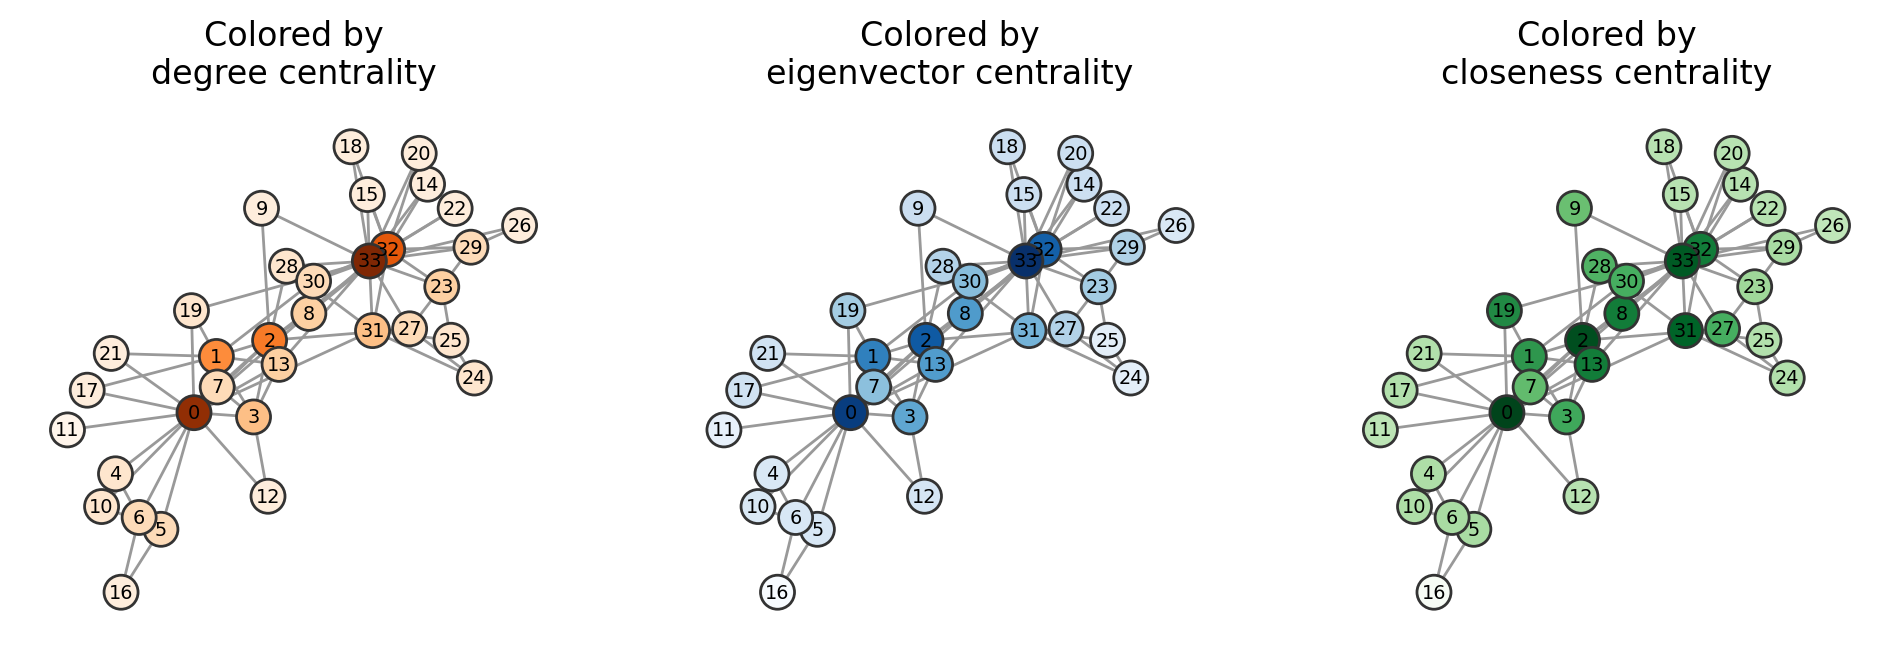

In [13]:
fig, ax = plt.subplots(1,3,figsize=(12,3.5),dpi=200)

col_map = {0:plt.cm.Oranges,
           1:plt.cm.Blues,
           2:plt.cm.Greens}
cent_labels = ['degree centrality',
               'eigenvector centrality',
               'closeness centrality']

for i,centrality in enumerate([nx.degree, nx.eigenvector_centrality, nx.closeness_centrality]):
    cents = dict(centrality(G))
    cent_vals = list(cents.values())
    cent_vals_minmax = (np.array(cent_vals)-min(cent_vals))/(max(cent_vals)-min(cent_vals))
    ncs = col_map[i](cent_vals_minmax)
    nx.draw(G, pos, node_size=150, node_color=ncs, edgecolors='.2',
            with_labels=True, font_size='x-small', edge_color='.6', ax=ax[i])
    ax[i].set_title("Colored by\n"+cent_labels[i])


plt.savefig('images/pngs/centrality_compare_networkx.png', dpi=425, bbox_inches='tight')
plt.savefig('images/pdfs/centrality_compare_networkx.pdf', bbox_inches='tight')

plt.show()

***We will not be going deep into detail of many other centrality measures, but the goal is that you have been exposed to a few of them and can understand the generic structure / motivation behind why they each exist. In Assignment 1, your task is to code one of these measures from scratch.***
_______________

## Network Null Models
Network null models provide a baseline for comparison, allowing researchers to evaluate whether observed network properties arise due to specific network structures or simply by chance. By generating random networks that preserve certain characteristics (e.g., node degrees or edge distributions), null models help to identify significant patterns, test hypotheses, and detect structural features such as clustering or community structures that deviate from randomness. They are essential for understanding the underlying processes shaping a network and for ensuring that conclusions drawn from network analysis are meaningful.

Below we'll walk through some examples!

### Degree-Preserving Randomization and Non-Degree-Preserving

#### Full Randomization
This algorithm generates a random (Erdős–Rényi) network with the same number of nodes and links as the original network.

We select randomly a source node (S1) and two target nodes, where the first target (T1) is linked directly to the source node and the second target (T2) is not. We rewire the S1-T1 link, turning it into an S1-T2 link. As a result the degree of the target nodes T1 and T2 changes. We perform this procedure once for each link in the network.

#### Degree-Preserving Randomization
This algorithm generates a network in which each node has exactly the same degree as in the original network, but the network’s wiring diagram has been randomized. We select two source (S1, S2) and two target nodes (T1, T2), such that initially there is a link between S1 and T1, and a link between S2 and T2. We then swap the two links, creating an S1-T2 and an S2-T1 link. The swap leaves the degree of each node unchanged. This procedure is repeated until we rewire each link at least once.

(excerpt from Chapter 4 of http://barabasi.com/networksciencebook/)

![](images/figure-4-17.png)



In [14]:
G = nx.karate_club_graph()

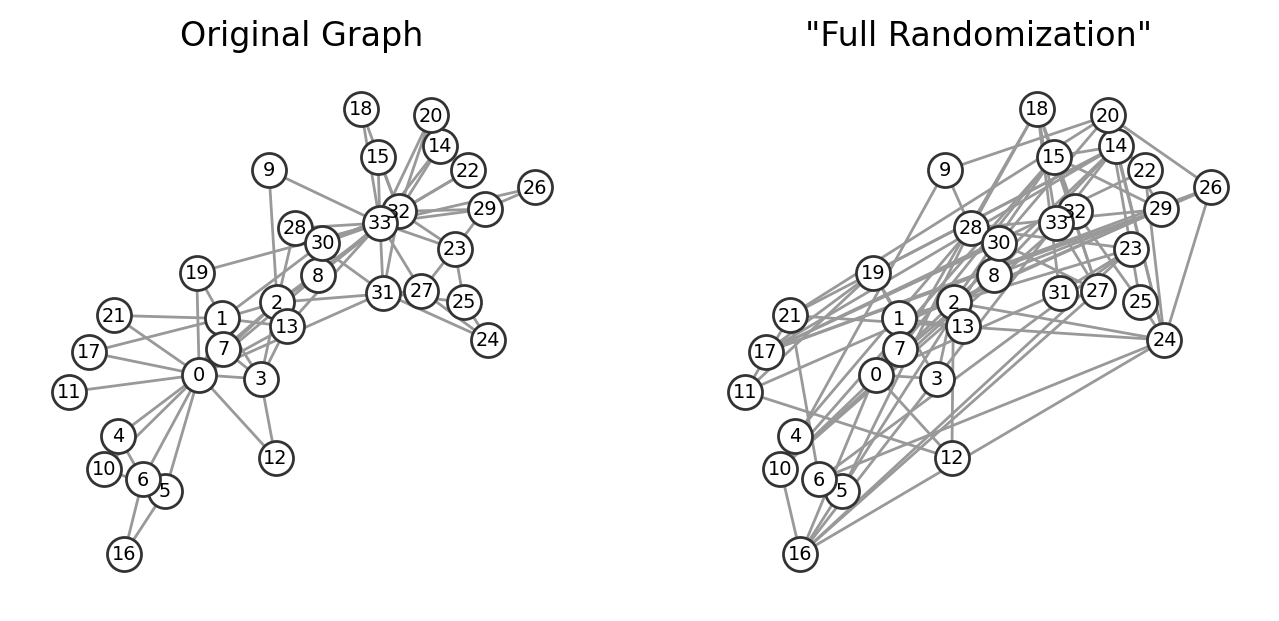

In [15]:
# Fully randomize your nodes and links:
N = G.number_of_nodes()
M = G.number_of_edges()

G_randomized = nx.gnm_random_graph(N,M)

fig, ax = plt.subplots(1,2,figsize=(8,3.5),dpi=200)

nx.draw(G, pos, node_size=150, node_color='w', edgecolors='.2',
        with_labels=True, font_size='x-small', edge_color='.6', ax=ax[0])
ax[0].set_title("Original Graph")

nx.draw(G_randomized, pos, node_size=150, node_color='w', edgecolors='.2',
        with_labels=True, font_size='x-small', edge_color='.6', ax=ax[1])
ax[1].set_title('"Full Randomization"')


# plt.savefig('images/pngs/null_models_fullrandomize.png', dpi=425, bbox_inches='tight')
# plt.savefig('images/pdfs/null_models_fullrandomize.pdf', bbox_inches='tight')

plt.show()

What about degree-preserving randomization?

In [16]:
def degree_preserving_randomization(G, n_iter=1000):
    """
    Perform degree-preserving randomization on a graph.

    Degree-preserving randomization, also known as edge swapping or rewiring, 
    is a method for creating randomized versions of a graph while preserving 
    the degree distribution of each node. This is achieved by repeatedly 
    swapping pairs of edges in the graph, ensuring that the degree (number of 
    edges connected) of each node remains unchanged. The result is a graph 
    with the same degree distribution but a randomized edge structure, which 
    can be used as a null model to compare with the original network.

    Parameters
    ----------
    G : networkx.Graph
        The input graph to be randomized. The graph can be directed or 
        undirected, but it must be simple (i.e., no self-loops or parallel edges).

    n_iter : int, optional (default=1000)
        The number of edge swap iterations to perform. A higher number of 
        iterations leads to more randomization, but the degree distribution 
        remains preserved. Typically, the number of iterations should be 
        proportional to the number of edges in the graph for sufficient 
        randomization.

    Returns
    -------
    G_random : networkx.Graph
        A randomized graph with the same degree distribution as the original 
        graph `G`, but with a shuffled edge structure.

    Notes
    -----
    - This method works by selecting two edges at random, say (u, v) and (x, y), 
      and attempting to swap them to (u, y) and (x, v) (or (u, x) and (v, y)), 
      ensuring that no self-loops or parallel edges are created in the process.
    - Degree-preserving randomization is particularly useful for creating null 
      models in network analysis, as it allows for the investigation of whether 
      specific network properties (e.g., clustering, path lengths) are a result 
      of the network's structure or just its degree distribution.
    - The effectiveness of randomization depends on the number of iterations 
      (`n_iter`). As a rule of thumb, using about 10 times the number of edges 
      in the graph for `n_iter` often provides sufficient randomization.
    
    Example
    -------
    >>> import networkx as nx
    >>> G = nx.erdos_renyi_graph(10, 0.5)
    >>> G_random = degree_preserving_randomization(G, n_iter=100)
    
    Citations
    ---------
    Milo, R., Shen-Orr, S., Itzkovitz, S., Kashtan, N., Chklovskii, D., & Alon, U. (2002). 
    Network motifs: simple building blocks of complex networks. *Science*, 298(5594), 824-827.
    
    Maslov, S., & Sneppen, K. (2002). Specificity and stability in topology of protein networks. 
    *Science*, 296(5569), 910-913.
    """

    G_random = G.copy()
    edges = list(G_random.edges())
    num_edges = len(edges)

    for _ in range(n_iter):
        # Select two random edges (u, v) and (x, y)
        edge1_id = np.random.choice(list(range(len(edges))))
        u, v = edges[edge1_id]
        edge2_id = np.random.choice(list(range(len(edges))))
        x, y = edges[edge2_id]

        # Avoid selecting the same edge pair or creating self-loops
        if len({u, v, x, y}) == 4:
            # Swap the edges with some probability
            if np.random.rand() > 0.5:
                # Swap (u, v) with (u, y) and (x, v)
                if not (G_random.has_edge(u, y) or G_random.has_edge(x, v)):
                    G_random.remove_edge(u, v)
                    G_random.remove_edge(x, y)
                    G_random.add_edge(u, y)
                    G_random.add_edge(x, v)
            else:
                # Swap (u, v) with (u, x) and (v, y)
                if not (G_random.has_edge(u, x) or G_random.has_edge(v, y)):
                    G_random.remove_edge(u, v)
                    G_random.remove_edge(x, y)
                    G_random.add_edge(u, x)
                    G_random.add_edge(v, y)

        # Update edge list after changes
        edges = list(G_random.edges())


    return G_random

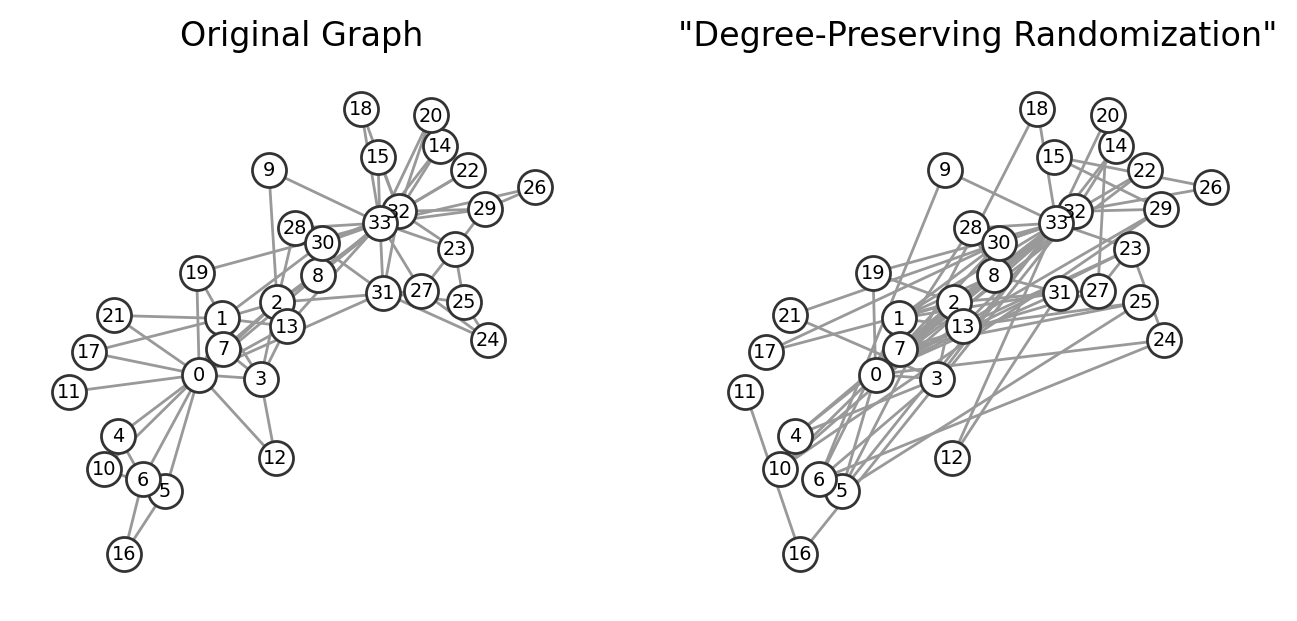

In [17]:
# Fully randomize your nodes and links:

G_randomized = degree_preserving_randomization(G)

fig, ax = plt.subplots(1,2,figsize=(8,3.5),dpi=200)

nx.draw(G, pos, node_size=150, node_color='w', edgecolors='.2',
        with_labels=True, font_size='x-small', edge_color='.6', ax=ax[0])
ax[0].set_title("Original Graph")

nx.draw(G_randomized, pos, node_size=150, node_color='w', edgecolors='.2',
        with_labels=True, font_size='x-small', edge_color='.6', ax=ax[1])
ax[1].set_title('"Degree-Preserving Randomization"')


# plt.savefig('images/pngs/null_models_degreepreservingrandomize.png', dpi=425, bbox_inches='tight')
# plt.savefig('images/pdfs/null_models_degreepreservingrandomize.pdf', bbox_inches='tight')

plt.show()

### Configuration Model

In the previous two network null models, we assumed that we had access to the graph itself. How would we sample random graphs from *only the degree sequence*?

The ***configuration model*** is a method for generating random networks while preserving the degree distribution of nodes. It works by assigning "stubs" or "half-edges" to each node based on its degree and then randomly pairing these stubs to create edges. This model is often used as a null model in network analysis to study how network properties, such as clustering or motifs, arise due to the degree sequence rather than the specific arrangement of edges.

The configuration model can result in networks with self-loops and parallel edges, but these can be removed if needed to produce a simple graph. By comparing a real network to its randomized configuration model counterpart, we can gain insights into which features of the network structure are non-random and statistically significant.

(excerpt from Chapter 4 of http://barabasi.com/networksciencebook/)

![](images/figure-4-15.png)

The configuration model, illustrated in the graphic above, builds a network with a pre-defined degree sequence.

In the network generated by the model, each node has a pre-defined degree $k_i$, but otherwise the network is wired randomly. Consequently the network is often called a random network with a pre-defined degree sequence. By repeatedly applying this procedure to the same degree sequence we can generate different networks with the same $p_k$ (Image 4.15b-d). There are a couple of caveats to consider:

1. The probability to have a link between nodes of degree $k_i$ and $k_j$ is: $p_{ij}=\frac{k_i k_j}{2L−1}$. Indeed, a stub starting from node i can connect to $2L - 1$ other stubs. Of these, $k_j$ are attached to node $j$. So the probability that a particular stub is connected to a stub of node $j$ is $\frac{k_j}{2L - 1}$. As node $i$ has $k_i$ stubs, it has $k_j$ attempts to link to $j$, resulting in (4.24).

2. The obtained network contains **self-loops** and **multi-edges**, nothing in the algorithm forbids a node from connecting to itself, or to generate multiple links between two nodes. We can choose to reject stub pairs that lead to these, but if we do so, we may not be able to complete the network. Rejecting self-loops or multi-links also means that not all possible matchings appear with equal probability.

3. The configuration model is frequently used in calculations, as in the equation above, and its inherently random character helps us analytically calculate numerous network measures.

In [18]:
import networkx as nx
from collections import Counter

def configuration_model_from_degree_sequence(degree_sequence, return_simple=True):
    """
    Generate a random graph using the configuration model from a given degree sequence
    without using the NetworkX built-in function.

    The configuration model generates a random graph that preserves the degree 
    sequence of nodes by assigning "stubs" or "half-edges" to each node and 
    randomly pairing these stubs to form edges. This process can result in 
    graphs with self-loops and parallel edges, which can be removed if needed.

    Parameters
    ----------
    degree_sequence : list of int
        A list representing the degree of each node in the graph. The sum of 
        the degrees in this sequence must be even for the configuration model 
        to create a valid graph.

    Returns
    -------
    G : networkx.MultiGraph
        A multigraph generated from the given degree sequence. The graph may 
        contain self-loops and parallel edges, which are allowed in the 
        configuration model.

    Notes
    -----
    - This method works by assigning "stubs" or "half-edges" to nodes based on 
      their degree and then randomly pairing them to form edges. The resulting 
      graph can have self-loops and parallel edges.
    - Self-loops and parallel edges can be removed post-generation if a simple 
      graph is required using NetworkX's `nx.Graph(G)`.
    - The degree sequence must have an even sum for a valid graph construction. 
      If the sum of the degrees is odd, no graph can be constructed.

    Time Complexity
    ---------------
    The time complexity is O(E), where E is the number of edges in the graph.

    Example
    -------
    >>> degree_sequence = [3, 3, 2, 2, 1, 1]
    >>> G = configuration_model_from_degree_sequence(degree_sequence)
    >>> nx.is_graphical(degree_sequence)
    True
    """

    # Check if the degree sequence is valid (sum of degrees must be even)
    if sum(degree_sequence) % 2 != 0:
        raise ValueError("The sum of the degree sequence must be even.")

    # Create stubs list: node i appears degree_sequence[i] times
    stubs = []
    for node, degree in enumerate(degree_sequence):
        stubs.extend([node] * degree)

    # Shuffle stubs to randomize the pairing process
    np.random.shuffle(stubs)

    # Initialize an empty multigraph
    G = nx.MultiGraph()

    # Add nodes to the graph
    G.add_nodes_from(range(len(degree_sequence)))

    # Pair stubs to create edges
    while stubs:
        u = stubs.pop()
        v = stubs.pop()

        # Add the edge to the graph
        G.add_edge(u, v)

    if return_simple:
        # Convert the multigraph to a simple graph (remove parallel edges and self-loops)
        G_simple = nx.Graph(G)  # This removes parallel edges and self-loops by default

        return G_simple

    else:
        return G

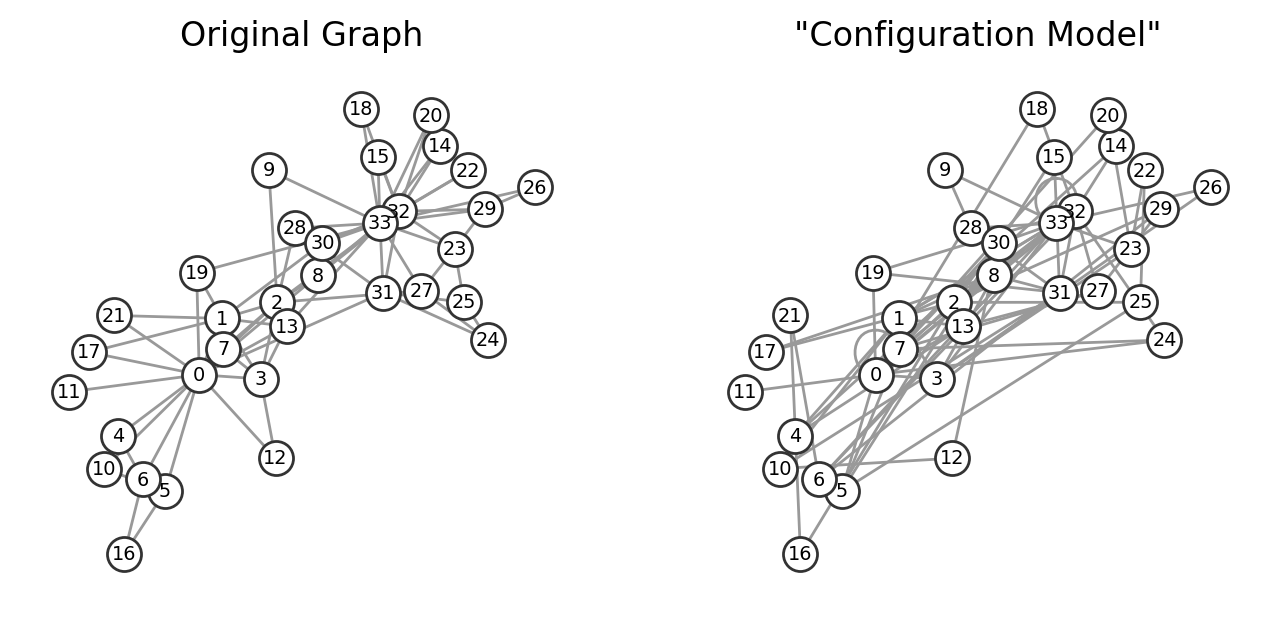

In [19]:
# Fully randomize your nodes and links:

G_randomized = configuration_model_from_degree_sequence(list(dict(G.degree()).values()),return_simple=True)

fig, ax = plt.subplots(1,2,figsize=(8,3.5),dpi=200)

nx.draw(G, pos, node_size=150, node_color='w', edgecolors='.2',
        with_labels=True, font_size='x-small', edge_color='.6', ax=ax[0])
ax[0].set_title("Original Graph")

nx.draw(G_randomized, pos, node_size=150, node_color='w', edgecolors='.2',
        with_labels=True, font_size='x-small', edge_color='.6', ax=ax[1])
ax[1].set_title('"Configuration Model"')


# plt.savefig('images/pngs/null_models_configurationmodel.png', dpi=425, bbox_inches='tight')
# plt.savefig('images/pdfs/null_models_configurationmodel.pdf', bbox_inches='tight')

plt.show()

__________
#### Supplemental Math

Notice that the inherent randomness of the networks generated using the configuration model allows the analytical calculation also of properties such as the clustering coefficient and the average shortest path in the general case of random uncorrelated graphs with given degree distribution $P(k)$. 

For instance, the general expression for the **average clustering coefficient** reads as:

$$ \left\langle C \right\rangle = \frac{1}{N} \frac{\left(\left\langle k^2 \right\rangle - \left\langle k \right\rangle\right)^2}{\left\langle k \right\rangle^3}.$$

This implies that the clustering properties have an intrinsic dependence on the degree distribution moments. In the limit of infinite size $N \rightarrow  \infty$, the clustering coefficient is null as expected in a completely random graph. However, in finite size networks with large fluctuations of the degree distribution, the clustering coefficient could have much larger values than in the case of the Poissonian Erdős–Rényi graph because of the large values attained by $\left\langle k^2\right\rangle$.

A generalization of the formula for the scaling of the **average shortest path** of the graph can similarly be obtained and reads:

$$ \left\langle l \right\rangle \simeq 1 + \frac{\log\left(N / \left\langle k \right\rangle\right)}{\log\left(\left(\left\langle k^2 \right\rangle - \left\langle k \right\rangle\right)/\left\langle k \right\rangle\right)}.$$

_________________

<!-- # __PROBLEM__

# Eigenvector centrality works fine for undirected networks. How about directed one?

# Think about this small directed network. What are their eigenvalue centralities?

# <img src="images/eigenvector_centrality_illustration.003.jpeg", style="width:600px; float:center;">

# __In general Eigenvector centrality has a major problem:__

# * creates issues outside strongly connected components

# * diffusion of importance 0 for nodes with in-degree 0


# ### Katz Centrality (1953)

# * a variation of Eigenvector centrality

#     * assign a small amount of centrality to each node initially

#     * so we define: $$x_i = \alpha \sum_j \mathbf{A}_{ij} x_j + \beta, \alpha>0, \beta>0$$

#     * in matrix notation: $$\mathbf{x} = \alpha \mathbf{A}\mathbf{x} + \beta\mathbf{1}$$

#     * thus $$\mathbf{x} = \beta(\mathbf{I} - \alpha \mathbf{A})^{-1}\mathbf{1}$$

# * The role of free parameter $\alpha$

#     * when $\alpha\rightarrow 0$, $$\mathbf{x}=\beta\mathrm{1}$$
    
#     * when $\det(\mathbf{I} - \alpha \mathbf{A}) = 0$, $$\mathbf{x} = \infty$$
  
#     * rewrite $\det(\mathbf{I} - \alpha \mathbf{A}) = 0$ as $$\det(\mathbf{A}-\alpha^{-1}\mathbf{I}) = 0$$
    
#     * simply we have the eigenvalue $\lambda = \frac{1}{\alpha}$
    
#     * thus we have to choose $$\frac{1}{\alpha} > \lambda_1 \quad \mathrm{OR} \quad  \alpha < \frac{1}{\lambda_1}$$ -->

#### If there's time...
Pick a network from networkrepository.com and randomize it's structure. Compute several graph properties and describe how they change after the network has been randomized.

In [20]:
pass

__________
## Next time...
Scraping Web Data 1 — BeautifulSoup, HTML, Pandas! `class_05_scraping1.ipynb`
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://asmithh.github.io/network-science-data-book/intro.html
    - Github: https://github.com/asmithh/network-science-data-book
    - Syllabus and course details: https://brennanklein.com/phys7332-fall24
2. Freeman, L.C. (1978). Centrality in Social Networks: Conceptual Clarification. *Social Networks*, vol. 1, no. 3, pp. 215-239. doi: https://doi.org/10.1016/0378-8733(78)90021-7.
3. Bonacich, P. (1972) Factoring and Weighting Approaches to Status Scores and Clique Identification. *Journal of Mathematical Sociology*, 2, 113-120. doi: https://doi.org/10.1080/0022250X.1972.9989806.
4. Maslov, S. & Sneppen, K. (2002). Specificity and stability in topology of protein networks. *Science*, 296:910-913. doi: https://doi.org/10.1126/science.1065103.
5. Oldham S, Fulcher B, Parkes L, Arnatkevic̆iūtė A, Suo C, Fornito A (2019) Consistency and differences between centrality measures across distinct classes of networks. *PLoS ONE* 14(7): e0220061. https://doi.org/10.1371/journal.pone.0220061
6. Newman (2018). Networks: An Introduction. Oxford University, Oxford.

______________